In [1]:
import cvxpy as cp
import numpy as np
from Enhrenfest_methods import *
np.random.seed(22)

In [2]:
''' Now I want to create the following parameter for each type of agents

    - potential_reward_lst: reward rate
    - mu_lst: intensity under the active phase
    - lambda_lst: intensity under the passive phase

    - num_types: The number of types
    - scale: Adjust the numerical scale of intensity
'''

def sample_mu_values(num_types, scale = 10):
    # Sample mus
    mus = np.random.uniform(0, 1, num_types) * scale
    return list(mus)

def sample_lambda_values(num_types, scale = 10):
    # Sample mus
    lambdas = np.random.uniform(0, 1, num_types) * scale
    return list(lambdas)

In [3]:

## This generates the normal MDP process
def generate_transition_matrix_with_dummy_states(num_arms, num_states, num_dummy_states, mu_lst, lambda_lst, time_step):
    # Initialize transition matrices
    P = np.zeros((num_arms, num_states + num_dummy_states, 2, num_states + num_dummy_states))
    K = num_states - 1

    for n in range(num_arms):
        for s in range(num_states):
            if s == 0:
                # Boundary condition for state 0 (active)
                P[n, s, 1, s + num_states] = 1

                P[n, s, 0, s + 1] = lambda_lst[n] * (K - s) * time_step
                P[n, s, 0, s] = 1 - (lambda_lst[n] * (K - s) * time_step)
            if s == num_states - 1:
                # Boundary condition for state 9 (passive)
                P[n, s, 0, s] = 1

                P[n, s, 1, s - 1 + num_states] = mu_lst[n] * s * time_step
                P[n, s, 1, s + num_states] = 1 - mu_lst[n] * s * time_step

            else:
                P[n, s, 0, s + 1] = lambda_lst[n] * (K - s) * time_step
                P[n, s, 0, s] = 1 - lambda_lst[n] * (K - s) * time_step
                P[n, s, 1, s - 1 + num_states] = mu_lst[n] * s * time_step
                P[n, s, 1, s + num_states] = 1 - mu_lst[n] * s * time_step
        # Transitions within dummy states (s in S_a)
        for s_a in range(num_states, num_states + num_dummy_states):
            normal_state_index = s_a - num_states
            # Copy transitions from the corresponding normal state for action 0 within dummy states
            P[n, s_a, 0, num_states:num_states + num_dummy_states] = P[n, normal_state_index, 0, 0:num_states]
            P[n, s_a, 1, num_states:num_states + num_dummy_states] = P[n, normal_state_index, 0, 0:num_states]

    return P

In [4]:
def comparison(S, N, group_member_num, K, S_prime, A, T, mu_lst,lambda_lst,time_step,potential_reward_lst,num_simulations = 20000, type = 'General'):
       # change here to generate different types of transition matrices
    P = generate_transition_matrix_with_dummy_states(N, S, S, mu_lst, lambda_lst, time_step)
    P_original = P[:, :S, :, :S]+P[:,:S,:,S:]

    optimal_reward, fluid_reward, fluid_std, fluid_time = fluid_policy(N, T, S, S_prime, A, K, group_member_num, P, num_simulations, potential_reward_lst, time_step)
    random_reward, random_std,random_time = random_policy(N, T, S, S_prime, A, K, group_member_num, P, num_simulations, potential_reward_lst, time_step)
    Q_difference_reward, Q_difference_std,Q_difference_time =  Q_difference_policy(N, T, S, S_prime, A, K, group_member_num, P, num_simulations, potential_reward_lst, time_step)
    infinite_whittle_reward, infinite_whittle_std,infinite_whittle_time = infinite_whittle_policy(N, T, S, S_prime, A, K, group_member_num, P, num_simulations, potential_reward_lst, time_step)
    finite_whittle_reward, finite_whittle_std,finite_whittle_time=finite_whittle_policy(N, T, S, S_prime, A, K, group_member_num, P, num_simulations, potential_reward_lst, time_step)
    original_whittle_reward, original_whittle_std,original_whittle_time = original_whittle_policy(N, T, S, A, K, group_member_num, P_original, num_simulations, potential_reward_lst, time_step)

    experiment_synthetic_result = {
        "Optimal": (optimal_reward, None),
        "fluid": (fluid_reward, fluid_std),
        "finite whittle": (finite_whittle_reward,finite_whittle_std),
        "inifinite whittle": (infinite_whittle_reward, infinite_whittle_std),
        "original whittle": (original_whittle_reward, original_whittle_std),
        "Q_difference": (Q_difference_reward, Q_difference_std),
        "random": (random_reward, random_std)
    }
    running_time_dict = {
        "fluid": (fluid_time),
        "finite whittle": (finite_whittle_time),
        "inifinite whittle": (infinite_whittle_time),
        "original whittle": (original_whittle_time),
        "Q_difference": (Q_difference_time),
        "random": (random_time)
    }
    
    plot_methods_with_confidence(experiment_synthetic_result, N, T, K, group_member_num, num_simulations, type, lower_bound_method="random")
    return experiment_synthetic_result,running_time_dict

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/cvxpy/problems/problem.py:158: UserWarning: Objective contains too many subexpressions. Consider vectorizing your CVXPY code to speed up compilation.
  warnings.warn("Objective contains too many subexpressions. "


Solver status: optimal
Optimal value: 7.217832258648182
Average total reward over 2000 simulations: 20.473077877397984, stdev is 2.859573576940889
Number of pulls in dummy states (LP-based policy): 0
Average Running Time: 17.74306 seconds
Average total achieved value over 2000 simulations (Random policy): 10.421437140622407, stdev is 0.9322069230130181
Average Running Time: 0.00000 seconds
Whittle Indices (including dummy states):
Average total achieved value over 2000 simulations (General Q difference index policy): 21.2550981432919, stdev is 1.8263275398505372
Average Running Time: 0.01722 seconds
Whittle Indices (including dummy states):
Average total achieved value over 2000 simulations (General Infinite Whittle index policy): 21.18812603454555, stdev is 1.8507320870799513
Average Running Time: 99.79477 seconds
Finite whittle (including dummy states):
Average total achieved value over 2000 simulations (Finite Whittle index policy): 21.22160264395625, stdev is 1.84740468486656
Avera

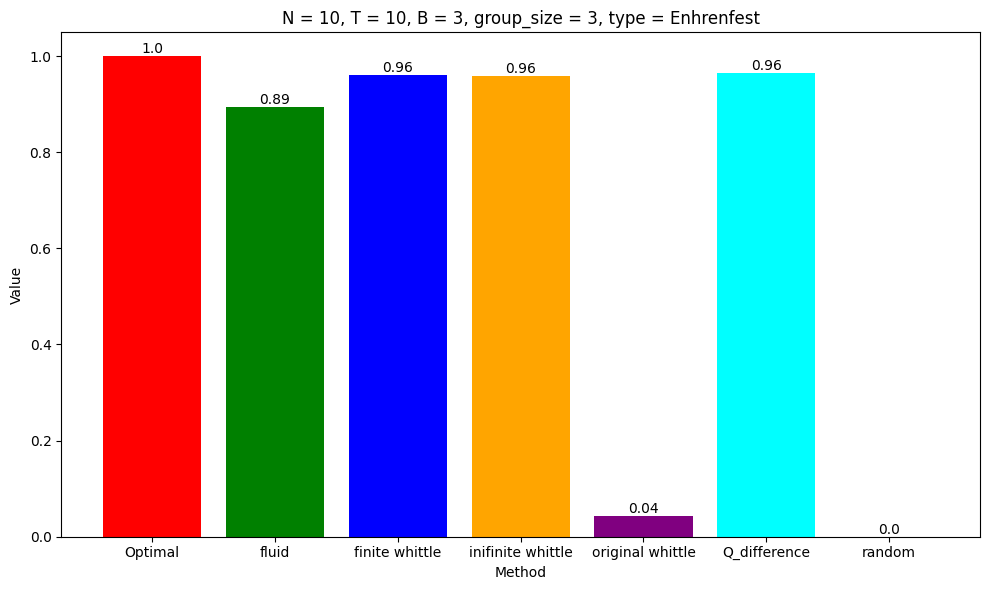

In [5]:
S = 10
N = 10
group_member_num = 3
K = 3
S_prime = S * 2
A = 2
T = 10
num_simulations = 2000
time_step = 0.01
mu_lst = sample_mu_values(N)
lambda_lst = sample_lambda_values(N)
potential_reward_lst = np.random.uniform(1, 10, N)
test_result, running_time_result=comparison(S, N, group_member_num, K, S_prime, A, T, mu_lst,lambda_lst,time_step,potential_reward_lst,num_simulations, 'Enhrenfest')

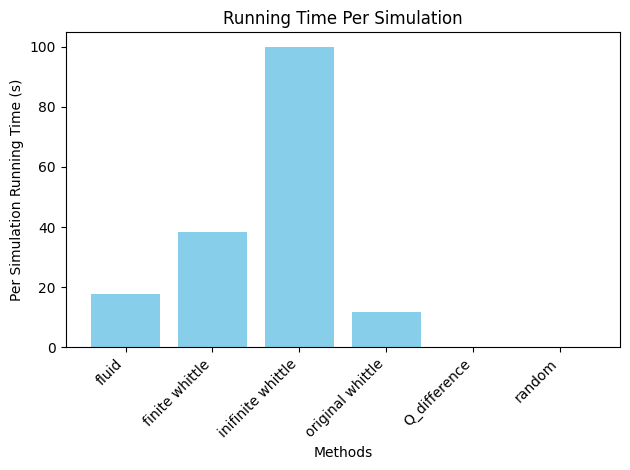

In [6]:
plot_running_time(running_time_result, N, T, K, group_member_num, 'General')